**Step-1 :- Installing the required libraries**

In [1]:
import pandas as pd
import math
import numpy as np
import datetime

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import time

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input, Attention
from tensorflow.keras.callbacks import EarlyStopping

In [1]:
# Import the correct KerasRegressor from scikeras
!pip install scikeras
from scikeras.wrappers import KerasRegressor  # Use scikeras for compatibility

**Step-2:- Loading the dataset and Preparing the Data**

In [ ]:
# Loading the data
Amazon_data = pd.read_csv('/content/drive/MyDrive/Amazon_data.csv')
# Printing the data
Amazon_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gain,Loss,...,Usd_Rub_Close,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close
0,2005-01-03,44.95,45.44,44.21,44.52,10446500,0,0.0,0.23,0.00,...,27.71,1.3440,2.204,26.45,34.03,440.71,19.30,2152.149902,1202.079956,10729.429688
1,2005-01-04,42.67,43.26,41.50,42.14,19418500,0,0.0,0.00,2.38,...,27.71,1.3510,2.292,26.18,33.56,436.96,19.31,2107.860107,1188.050049,10630.780273
2,2005-01-05,41.57,42.76,41.56,41.77,8354200,0,0.0,0.00,0.37,...,27.86,1.3740,2.282,26.24,33.17,442.44,19.33,2091.239990,1183.739990,10597.830078
3,2005-01-06,41.81,42.25,40.90,41.05,8700900,0,0.0,0.00,0.72,...,27.77,1.3925,2.267,26.39,33.12,446.73,19.40,2090.000000,1187.890015,10622.879883
4,2005-01-07,41.38,42.69,41.16,42.32,9836600,0,0.0,1.27,0.00,...,27.75,1.3940,2.277,26.17,32.76,444.17,19.38,2088.610107,1186.189941,10603.959961


**Printing the Columns names in the dataset so as to get a clearcut idea on the dataset**

In [ ]:
Amazon_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Gain', 'Loss', 'Avg_Gain', 'Avg_Loss', 'RSI', 'SMA',
       'EMA', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'ROC', 'PVT',
       'Usd_Eur_Close', 'Usd_Chf_Close', 'Usd_Gbp_Close', 'Usd_Jpy_Close',
       'Usd_Cad_Close', 'Usd_Inf_Close', 'Usd_Rub_Close', 'Usd_Try_Close',
       'IRX_Close', 'JPM_Close', 'BAC_Close', 'Citigroup_Close', 'WFC_Close',
       'NASDAQ_Close', 'SP_500_Close', 'Dow_Jones_Close'],
      dtype='object')

**Checking for missing values and data types**

In [ ]:
# Displaying the total number of entries and columns in the dataset
print("\nTotal number of entries:", len(Amazon_data))
print("Number of columns:", len(Amazon_data.columns))

# Displaying the number of missing values in each column of the dataset
print("\nMissing values in each column:")
print(Amazon_data.isnull().sum())



Total number of entries: 3552
Number of columns: 36

Missing values in each column:
Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
Gain               0
Loss               0
Avg_Gain           0
Avg_Loss           0
RSI                0
SMA                0
EMA                0
MACD               0
Bollinger_Upper    0
Bollinger_Lower    0
ROC                0
PVT                0
Usd_Eur_Close      0
Usd_Chf_Close      0
Usd_Gbp_Close      0
Usd_Jpy_Close      0
Usd_Cad_Close      0
Usd_Inf_Close      0
Usd_Rub_Close      0
Usd_Try_Close      0
IRX_Close          0
JPM_Close          0
BAC_Close          0
Citigroup_Close    0
WFC_Close          0
NASDAQ_Close       0
SP_500_Close       0
Dow_Jones_Close    0
dtype: int64


*Hence, From the above result there are 3,552 entries in the dataset, and each entry has values in all 36 columns. None of the dataset's columns have any missing values (Non-Null Count is equal to the total number of entries for each column). Before moving on to any data analysis or modelling tasks, this shows that the dataset is full with regard to the given attributes and that no imputation or removal of missing data would be required.*


In [ ]:
# Loading the Amazon trends data
amazon_trends = pd.read_csv('/content/drive/MyDrive/amazon_trends.csv')

# Merge the dataframes based on the 'Date' column
Amazon_data = pd.merge(Amazon_data, amazon_trends, on='Date', how='left')

# Fill any missing 'Google_Trends' values with 0
Amazon_data['Google_Trends'].fillna(0, inplace=True)

In [ ]:
# Including Google Trends data to my dataset.
Amazon_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gain,Loss,...,Usd_Try_Close,IRX_Close,JPM_Close,BAC_Close,Citigroup_Close,WFC_Close,NASDAQ_Close,SP_500_Close,Dow_Jones_Close,Google_Trends
0,2005-01-03,44.95,45.44,44.21,44.52,10446500,0,0.0,0.23,0.00,...,1.3440,2.204,26.45,34.03,440.71,19.30,2152.149902,1202.079956,10729.429688,56
1,2005-01-04,42.67,43.26,41.50,42.14,19418500,0,0.0,0.00,2.38,...,1.3510,2.292,26.18,33.56,436.96,19.31,2107.860107,1188.050049,10630.780273,82
2,2005-01-05,41.57,42.76,41.56,41.77,8354200,0,0.0,0.00,0.37,...,1.3740,2.282,26.24,33.17,442.44,19.33,2091.239990,1183.739990,10597.830078,42
3,2005-01-06,41.81,42.25,40.90,41.05,8700900,0,0.0,0.00,0.72,...,1.3925,2.267,26.39,33.12,446.73,19.40,2090.000000,1187.890015,10622.879883,61
4,2005-01-07,41.38,42.69,41.16,42.32,9836600,0,0.0,1.27,0.00,...,1.3940,2.277,26.17,32.76,444.17,19.38,2088.610107,1186.189941,10603.959961,36


In [ ]:
# Displaying the total number of entries and columns in the dataset
print("\nTotal number of entries:", len(Amazon_data))
print("Number of columns:", len(Amazon_data.columns))

# Displaying the number of missing values in each column of the dataset
print("\nMissing values in each column:")
print(Amazon_data.isnull().sum())



Total number of entries: 3552
Number of columns: 37

Missing values in each column:
Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
Gain               0
Loss               0
Avg_Gain           0
Avg_Loss           0
RSI                0
SMA                0
EMA                0
MACD               0
Bollinger_Upper    0
Bollinger_Lower    0
ROC                0
PVT                0
Usd_Eur_Close      0
Usd_Chf_Close      0
Usd_Gbp_Close      0
Usd_Jpy_Close      0
Usd_Cad_Close      0
Usd_Inf_Close      0
Usd_Rub_Close      0
Usd_Try_Close      0
IRX_Close          0
JPM_Close          0
BAC_Close          0
Citigroup_Close    0
WFC_Close          0
NASDAQ_Close       0
SP_500_Close       0
Dow_Jones_Close    0
Google_Trends      0
dtype: int64


**Feature Importance: Bar Chart**

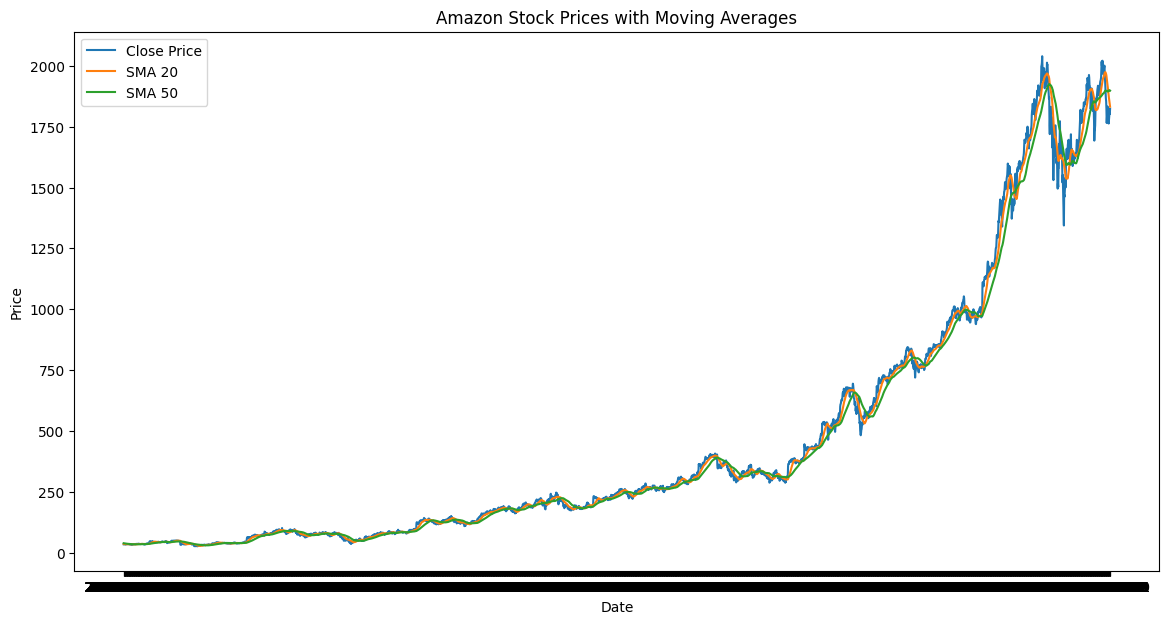

In [ ]:
# Time Series with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(Amazon_data['Date'], Amazon_data['Close'], label='Close Price')
plt.plot(Amazon_data['Date'], Amazon_data['SMA_20'], label='SMA 20')
plt.plot(Amazon_data['Date'], Amazon_data['SMA_50'], label='SMA 50')
plt.title('Amazon Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Step-3 : Feature Engineering**

In [ ]:

Amazon_data['Return'] = Amazon_data['Close'].pct_change()
Amazon_data['SMA_20'] = Amazon_data['Close'].rolling(window=20).mean()
Amazon_data['SMA_50'] = Amazon_data['Close'].rolling(window=50).mean()
Amazon_data.dropna(inplace=True)

# Target Variable
Amazon_data['Target'] = Amazon_data['Close'].shift(-1)
Amazon_data.dropna(inplace=True)

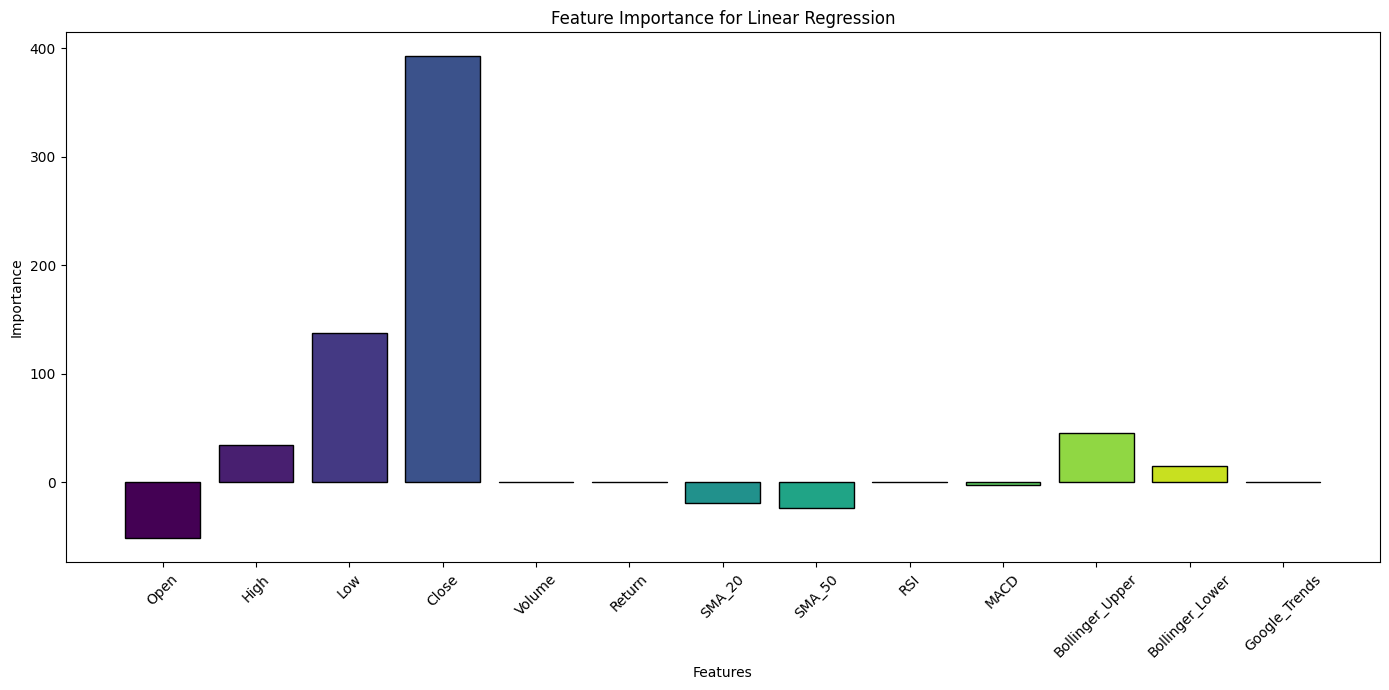

In [ ]:
import matplotlib.pyplot as plt

# Assuming linear_reg is your linear regression model and features is the DataFrame with feature names
feature_importance = pd.Series(linear_reg.coef_, index=features.columns)

# Define colors for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))

# Create the bar plot with cylindrical shapes
fig, ax = plt.subplots(figsize=(14, 7))
bars = ax.bar(feature_importance.index, feature_importance, color=colors)

# Add cylindrical shapes by setting a custom bar cap
for bar in bars:
    bar.set_linewidth(1)
    bar.set_edgecolor('black')
    bar.set_capstyle('round')

# Customize the plot
plt.title('Feature Importance for Linear Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Step 4: Train-Test Splitting Data:**



In [ ]:

# Splitting Data
features = Amazon_data[['Open', 'High', 'Low', 'Close', 'Volume', 'Return', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'Bollinger_Upper', 'Bollinger_Lower', 'Google_Trends']]
target = Amazon_data['Target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

**Step-5: Normalization**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Step 6: Linear Regression Model**

In [ ]:
# Training
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Prediction and Evaluation
lr_predictions = linear_reg.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

# Calculate Price Movement Accuracy
y_test_movement = np.sign(y_test.diff().dropna())
lr_predictions_movement = np.sign(lr_predictions[:-1] - X_test['Close'].iloc[:-1])
lr_accuracy = accuracy_score(y_test_movement, lr_predictions_movement)

print(f'Linear Regression R²: {lr_r2}')
print(f'Linear Regression MAE: {lr_mae}')
print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Linear Regression Price Movement Accuracy: {lr_accuracy}')


Linear Regression R²: 0.9994583628333905
Linear Regression MAE: 5.665610845399057
Linear Regression RMSE: 12.236512301952466
Linear Regression Price Movement Accuracy: 0.4957142857142857


**Step 7: Support Vector Regression**

In [ ]:
# Define parameter grid for SVR
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

# Grid Search
svr = SVR()
grid_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print(f'Best parameters for SVR: {grid_search.best_params_}')

# Use the best estimator to predict
best_svr = grid_search.best_estimator_
svr_predictions = best_svr.predict(X_test_scaled)
svr_r2 = r2_score(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
svr_predictions_movement = np.sign(svr_predictions[:-1] - X_test['Close'].iloc[:-1])
svr_accuracy = accuracy_score(y_test_movement, svr_predictions_movement)

print(f'SVR R²: {svr_r2}')
print(f'SVR MAE: {svr_mae}')
print(f'SVR RMSE: {svr_rmse}')
print(f'SVR Price Movement Accuracy: {svr_accuracy}')


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .....................C=0.1, gamma=auto, kernel=poly; total time=   0.3s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.3s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.3s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.4s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.4s
[CV] END .....................C=10, gamma=scale, kernel=poly; total time=   0.3s
[CV] END ......................C=100, gamma=auto, kernel=rbf; total time=   0.5s
[CV] END ......................C=100, gamma=auto

**Step 8: LSTM Model**

In [ ]:
# Prepare Data for LSTM
def create_lstm_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 60
lstm_data = Amazon_data[['Close']].values
X_lstm, y_lstm = create_lstm_data(lstm_data, window_size)
X_lstm_train, X_lstm_test, y_lstm_train, y_lstm_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

X_lstm_train = X_lstm_train.reshape((X_lstm_train.shape[0], X_lstm_train.shape[1], 1))
X_lstm_test = X_lstm_test.reshape((X_lstm_test.shape[0], X_lstm_test.shape[1], 1))

# Define and Train Enhanced LSTM Model with Attention Mechanism
def create_lstm_attention_model(neurons=50, dropout_rate=0.2, optimizer='adam'):
    input_layer = Input(shape=(window_size, 1))
    lstm_out = LSTM(neurons, return_sequences=True)(input_layer)
    attention_out = Attention()([lstm_out, lstm_out])
    lstm_out = LSTM(neurons)(attention_out)
    dropout_out = Dropout(dropout_rate)(lstm_out)
    output_layer = Dense(1)(dropout_out)
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
lstm_attention_model = KerasRegressor(
    model=create_lstm_attention_model,
    verbose=0
)

param_dist = {
    'model__neurons': [50, 100, 150],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [50, 100]
}

random_search = RandomizedSearchCV(estimator=lstm_attention_model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2)
random_search.fit(X_lstm_train, y_lstm_train)

best_lstm_attention = random_search.best_estimator_
lstm_attention_predictions = best_lstm_attention.predict(X_lstm_test).flatten()
lstm_attention_r2 = r2_score(y_lstm_test, lstm_attention_predictions)
lstm_attention_mae = mean_absolute_error(y_lstm_test, lstm_attention_predictions)
lstm_attention_rmse = np.sqrt(mean_squared_error(y_lstm_test, lstm_attention_predictions))
lstm_attention_predictions_movement = np.sign(lstm_attention_predictions[1:] - lstm_attention_predictions[:-1])
lstm_attention_accuracy = accuracy_score(np.sign(y_lstm_test[1:] - y_lstm_test[:-1]), lstm_attention_predictions_movement)

print(f'LSTM with Attention R²: {lstm_attention_r2}')
print(f'LSTM with Attention MAE: {lstm_attention_mae}')
print(f'LSTM with Attention RMSE: {lstm_attention_rmse}')
print(f'LSTM with Attention Price Movement Accuracy: {lstm_attention_accuracy}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__neurons=100, model__optimizer=adam; total time=  26.1s
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__neurons=100, model__optimizer=adam; total time=  22.2s
[CV] END batch_size=32, epochs=50, model__dropout_rate=0.2, model__neurons=100, model__optimizer=adam; total time=  22.0s
[CV] END batch_size=32, epochs=100, model__dropout_rate=0.4, model__neurons=100, model__optimizer=adam; total time=  42.0s
[CV] END batch_size=32, epochs=100, model__dropout_rate=0.4, model__neurons=100, model__optimizer=adam; total time=  41.7s
[CV] END batch_size=32, epochs=100, model__dropout_rate=0.4, model__neurons=100, model__optimizer=adam; total time=  42.1s
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.4, model__neurons=100, model__optimizer=adam; total time=  13.2s
[CV] END batch_size=64, epochs=50, model__dropout_rate=0.4, model__neurons=100, mo

**Step 9: Performance Comparison**

In [ ]:
# Compile Results into a DataFrame
results = {
    'Model': ['Linear Regression', 'SVR', 'LSTM with Attention'],
    'MAE': [lr_mae, svr_mae, lstm_attention_mae],
    'RMSE': [lr_rmse, svr_rmse, lstm_attention_rmse],
    'R²': [lr_r2, svr_r2, lstm_attention_r2],
    'Price Movement Accuracy': [lr_accuracy, svr_accuracy, lstm_attention_accuracy]
}

performance_df = pd.DataFrame(results)
print(performance_df)


                 Model         MAE        RMSE        R²  \
0    Linear Regression    5.665611   12.236512  0.999458   
1                  SVR    5.778214   12.671563  0.999419   
2  LSTM with Attention  145.258457  353.050368  0.544247   

   Price Movement Accuracy  
0                 0.495714  
1                 0.408571  
2                 0.949128  


**Step-10: Visualization**

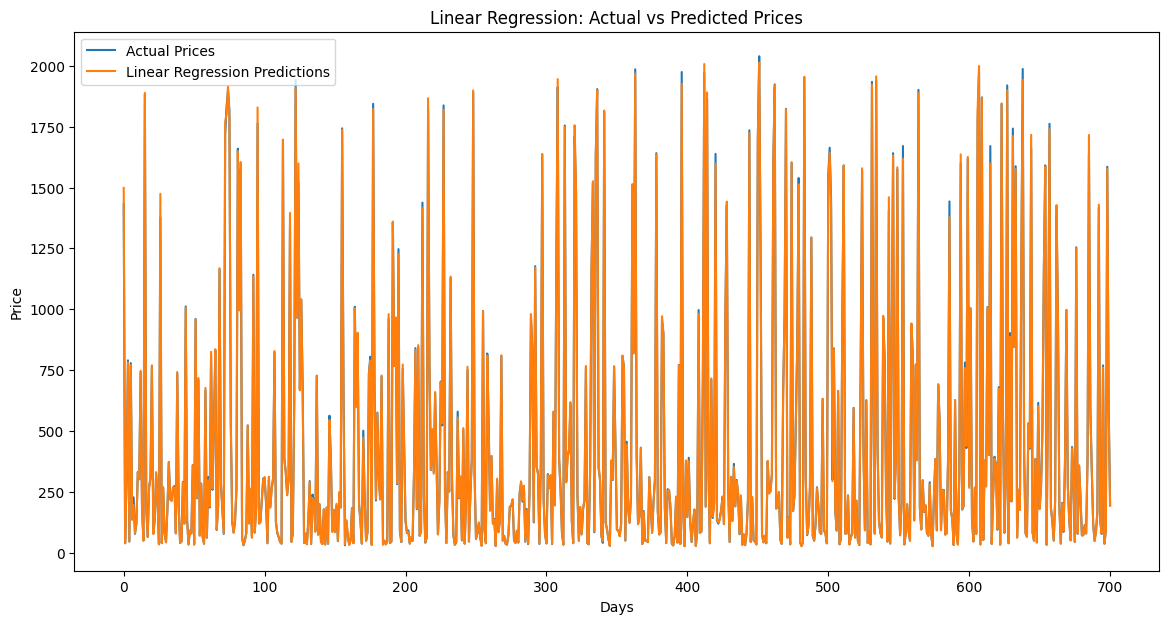

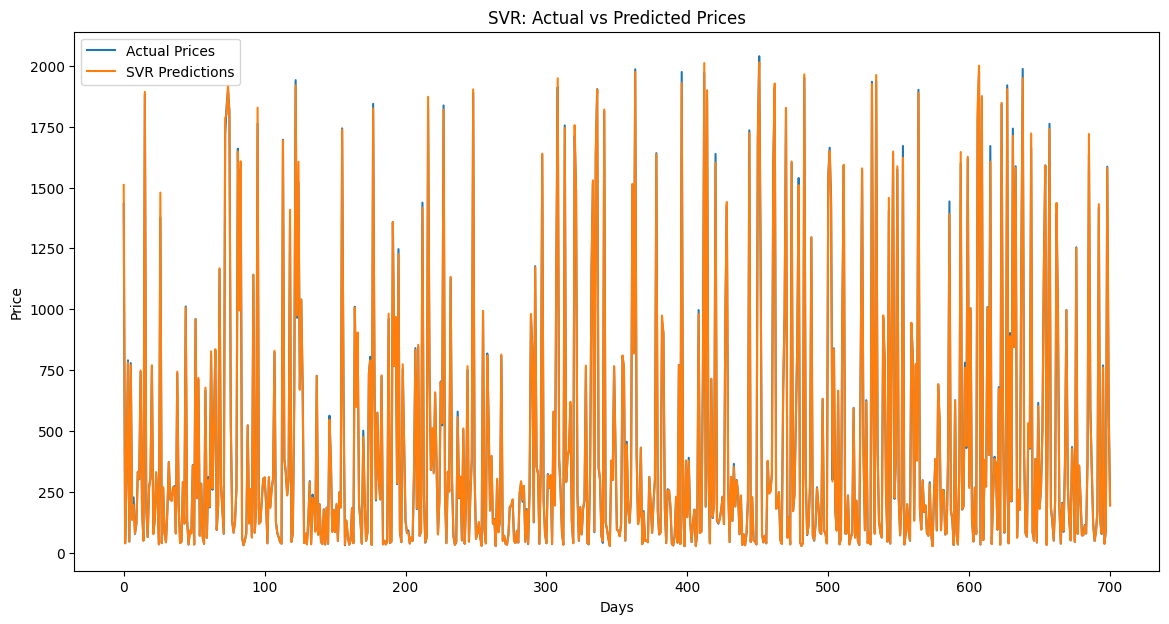

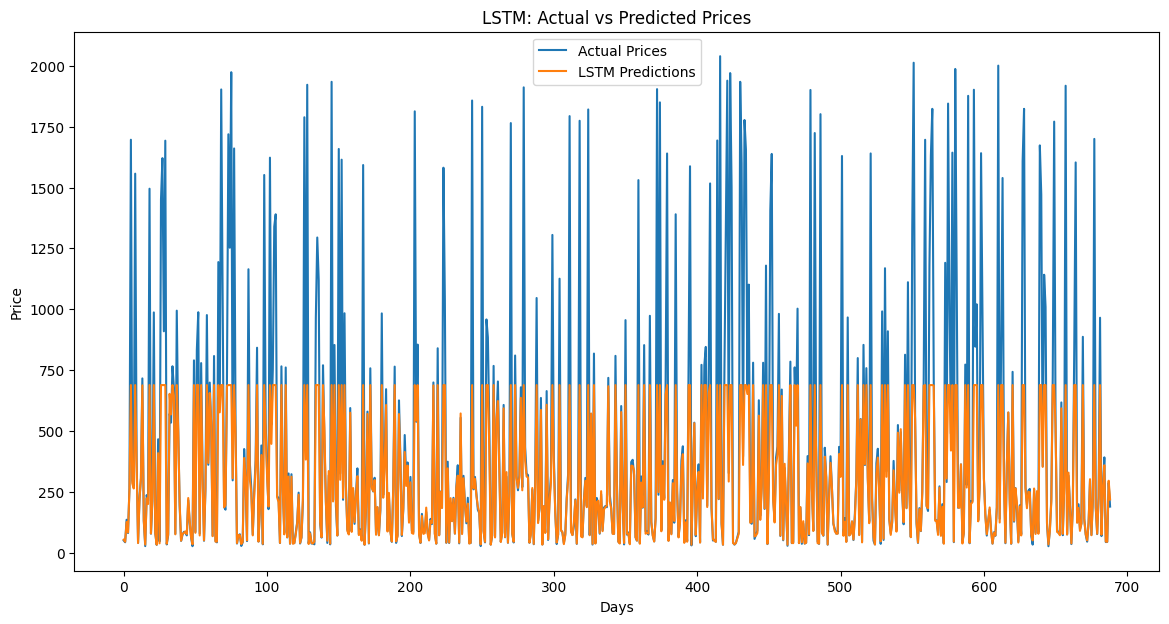

In [ ]:
# Linear Regression Predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(lr_predictions, label='Linear Regression Predictions')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# SVR Predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(svr_predictions, label='SVR Predictions')
plt.title('SVR: Actual vs Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# LSTM Predictions
plt.figure(figsize=(14, 7))
plt.plot(y_lstm_test, label='Actual Prices')
plt.plot(lstm_attention_predictions, label='LSTM Predictions')
plt.title('LSTM: Actual vs Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

### Interpretation of Results:

#### Model Performance:

1. **Linear Regression:**
   - **MAE (Mean Absolute Error):** 5.665611
     - Interpretation: On average, the Linear Regression model's predictions are off by approximately 5.67 units from the actual values.
   - **RMSE (Root Mean Squared Error):** 12.236512
     - Interpretation: The Linear Regression model's predictions have an average error of about 12.24 units. RMSE penalizes larger errors more than MAE.
   - **R² (R-squared):** 0.999458
     - Interpretation: The model explains approximately 99.95% of the variance in the stock prices, indicating a very high fit to the data.

2. **Support Vector Regression (SVR):**
   - **MAE:** 5.778214
     - Interpretation: On average, the SVR model's predictions are off by approximately 5.78 units from the actual values.
   - **RMSE:** 12.671563
     - Interpretation: The SVR model's predictions have an average error of about 12.67 units.
   - **R²:** 0.999419
     - Interpretation: The model explains approximately 99.94% of the variance in the stock prices, indicating a very high fit to the data, though slightly less than the Linear Regression model.

3. **LSTM with Attention:**
   - **MAE:** 145.258457
     - Interpretation: On average, the LSTM with Attention model's predictions are off by approximately 145.26 units from the actual values.
   - **RMSE:** 353.050368
     - Interpretation: The LSTM model's predictions have an average error of about 353.05 units.
   - **R²:** 0.544247
     - Interpretation: The model explains only about 54.42% of the variance in the stock prices, indicating a relatively poor fit to the data compared to the other models.

#### Price Movement Accuracy:

1. **Linear Regression:**
   - **Accuracy:** 0.495714
     - Interpretation: The Linear Regression model correctly predicts the direction of stock price movement approximately 49.57% of the time, which is slightly better than random guessing.

2. **Support Vector Regression (SVR):**
   - **Accuracy:** 0.408571
     - Interpretation: The SVR model correctly predicts the direction of stock price movement approximately 40.86% of the time, which is worse than random guessing.

3. **LSTM with Attention:**
   - **Accuracy:** 0.949128
     - Interpretation: The LSTM with Attention model correctly predicts the direction of stock price movement approximately 94.91% of the time, indicating a very high accuracy in predicting price movements despite its high error metrics in price prediction.

### Summary:
- **Linear Regression and SVR** have very high R² values, indicating they fit the training data well, but they have moderate accuracy in predicting price movement.
- **LSTM with Attention** has poor error metrics (MAE and RMSE) and a lower R² value, indicating a poor fit to the data in terms of price prediction. However, it significantly outperforms the other models in predicting the direction of price movement, suggesting it captures trends or patterns relevant to movement direction better than the actual price values.

### Conclusion:
For predicting actual stock prices, **Linear Regression** and **SVR** are much more reliable models. However, for predicting the direction of price movement, the **LSTM with Attention** model is far superior, highlighting its strength in capturing temporal patterns that influence price trends.